# Homework 4 | SNA in Marketing

Elen Petrosyan

In [40]:
file_path = 'connections.txt'

In [ ]:
pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.1 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from igraph import Graph, plot

In [ ]:
# Loading data from the 'connections.txt' file
with open('connections.txt', 'r') as f:
    data = f.readlines()

# Create a directed graph
DG = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        nodes = line.strip().split()
        src, dest = map(int, nodes)
        DG.add_edge(src, dest)

DG

In [ ]:
#task2

# To find bridges, we need to convert the directed graph to an undirected graph
undir_graph = DG.to_undirected()

# Identifying bridges in the undirected graph
bridges = list(nx.bridges(undir_graph))

# identified bridges
print("Identified Bridges:", bridges)



Identified Bridges: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


In [ ]:
#task3

# Calculate the density of the directed graph
density = nx.density(DG)

print("Density of the Graph:", density)

# findings
if density < 0.1:
    comment = "The graph is sparse."
elif density > 0.5:
    comment = "The graph is dense."
else:
    comment = "The graph has a moderate level of density."

print(comment)

Density of the Graph: 0.0054099817517196435
The graph is sparse.


In [ ]:
#task4

# for a directed graph, we consider the total degree (in-degree + out-degree)

# Calculating in-degree and out-degree for each node
in_degrees = dict(DG.in_degree())
out_degrees = dict(DG.out_degree())

# Identifying the node with the highest total degree (in-degree + out-degree)
max_degree_node = max(DG.nodes, key=lambda n: in_degrees[n] + out_degrees[n])
max_degree = in_degrees[max_degree_node] + out_degrees[max_degree_node]

# Identifying the node with the lowest total degree (in-degree + out-degree)
min_degree_node = min(DG.nodes, key=lambda n: in_degrees[n] + out_degrees[n])
min_degree = in_degrees[min_degree_node] + out_degrees[min_degree_node]

max_degree_node, max_degree, min_degree_node, min_degree

(107, 1045, 11, 1)

In [ ]:
#task5


# Node with the highest incoming connections (maximum in-degree)
max_in_degree_node = max(DG.nodes, key=lambda n: in_degrees[n])
max_in_degree = in_degrees[max_in_degree_node]

# Node with the highest outgoing connections (maximum out-degree)
max_out_degree_node = max(DG.nodes, key=lambda n: out_degrees[n])
max_out_degree = out_degrees[max_out_degree_node]

max_in_degree_node, max_in_degree, max_out_degree_node, max_out_degree

(1888, 251, 107, 1043)

In [ ]:
# task 6

# Calculating centrality measures
closeness_centrality = nx.closeness_centrality(DG)
betweenness_centrality = nx.betweenness_centrality(DG)
eigenvector_centrality = nx.eigenvector_centrality(DG, max_iter=1000)

# Finding the nodes with the highest centrality values
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

# Displaying these nodes and their centrality values
print("Node with the highest closeness centrality:", max_closeness_node)
print("Node with the highest betweenness centrality:", max_betweenness_node)
print("Node with the highest eigenvector centrality:", max_eigenvector_node)

Node with the highest closeness centrality: 2642
Node with the highest betweenness centrality: 1684
Node with the highest eigenvector centrality: 2655


In [ ]:
#task7

# Creating an undirected graph using edges from the existing NetworkX graph
igraph_net = Graph.TupleList(undir_graph.edges(), directed=False)

# Performing community detection using the Louvain method
community_data = igraph_net.community_multilevel()
community_membership = community_data.membership

# Creating a dictionary to map each node in the original graph to its community
node_community_map = {node: community_membership[node] for node in DG.nodes()}

# Calculating the number of distinct communities
total_communities = len(set(node_community_map.values()))
print(f"Total number of communities detected: {total_communities}")


Total number of communities detected: 15


In [ ]:
#task8

# Converting the directed graph to an undirected graph for community detection
undirected_graph = DG.to_undirected()

# Using the Asynchronous Fluid Communities algorithm to detect communities
communities = list(nx.community.asyn_fluidc(undirected_graph, k=5))

# Calculating the sizes of each community
community_sizes = [len(community) for community in communities]

# Identifying the largest and smallest communities
largest_community_size = max(community_sizes)
smallest_community_size = min(community_sizes)

# Finding the corresponding communities
largest_community = communities[community_sizes.index(largest_community_size)]
smallest_community = communities[community_sizes.index(smallest_community_size)]

largest_community, largest_community_size, smallest_community, smallest_community_size

({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  48,
  49,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  59,
  60,
  61,
  62,
  63,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  120,
  121,
  122,
  123,
  124,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  164,
  165,
  167,
  168,
  169,
  17

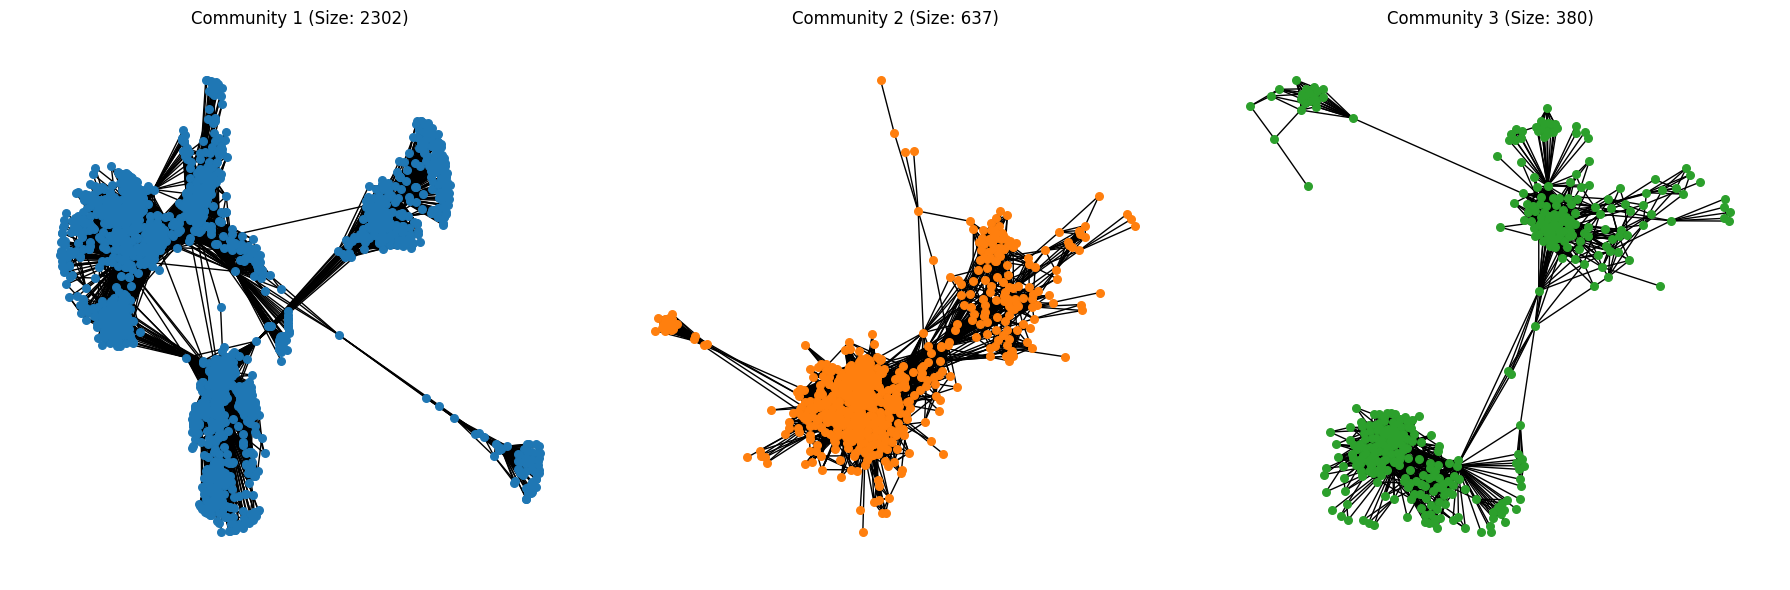

In [ ]:
#task9

# Sorting communities by size and selecting the largest three
largest_three_communities = sorted(communities, key=len, reverse=True)[:3]

# Plotting the largest three communities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, community in enumerate(largest_three_communities):
    # Subgraph for each community
    subgraph = undirected_graph.subgraph(community)

    # Using a spring layout for better visualization
    pos = nx.spring_layout(subgraph)

    # Drawing the subgraph
    nx.draw(subgraph, pos, ax=axes[i], with_labels=False, node_color=f'C{i}', node_size=30)
    axes[i].set_title(f'Community {i+1} (Size: {len(community)})')

plt.tight_layout()
plt.show()

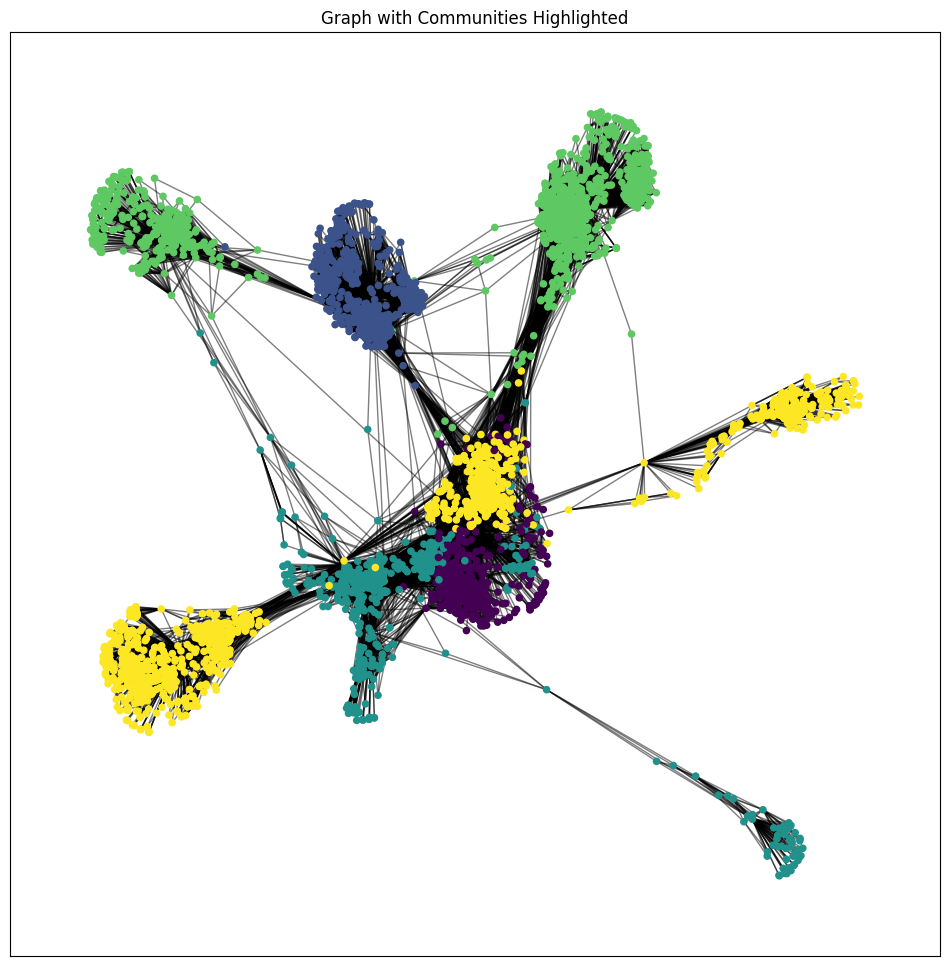

In [ ]:
# Using the Asynchronous Fluid Communities algorithm to detect communities
communities = list(nx.community.asyn_fluidc(undirected_graph, k=5))

# Creating a mapping of nodes to their communities for visualization
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Visualizing the graph with communities highlighted
fig, ax = plt.subplots(figsize=(12, 12))

# Creating a color map for communities
colors = [community_map[node] for node in undirected_graph.nodes()]

# Drawing the graph
pos = nx.spring_layout(undirected_graph)  # positions for all nodes
nx.draw_networkx_nodes(undirected_graph, pos, node_size=20, node_color=colors, ax=ax)
nx.draw_networkx_edges(undirected_graph, pos, alpha=0.5, ax=ax)

plt.title("Graph with Communities Highlighted")
plt.show()

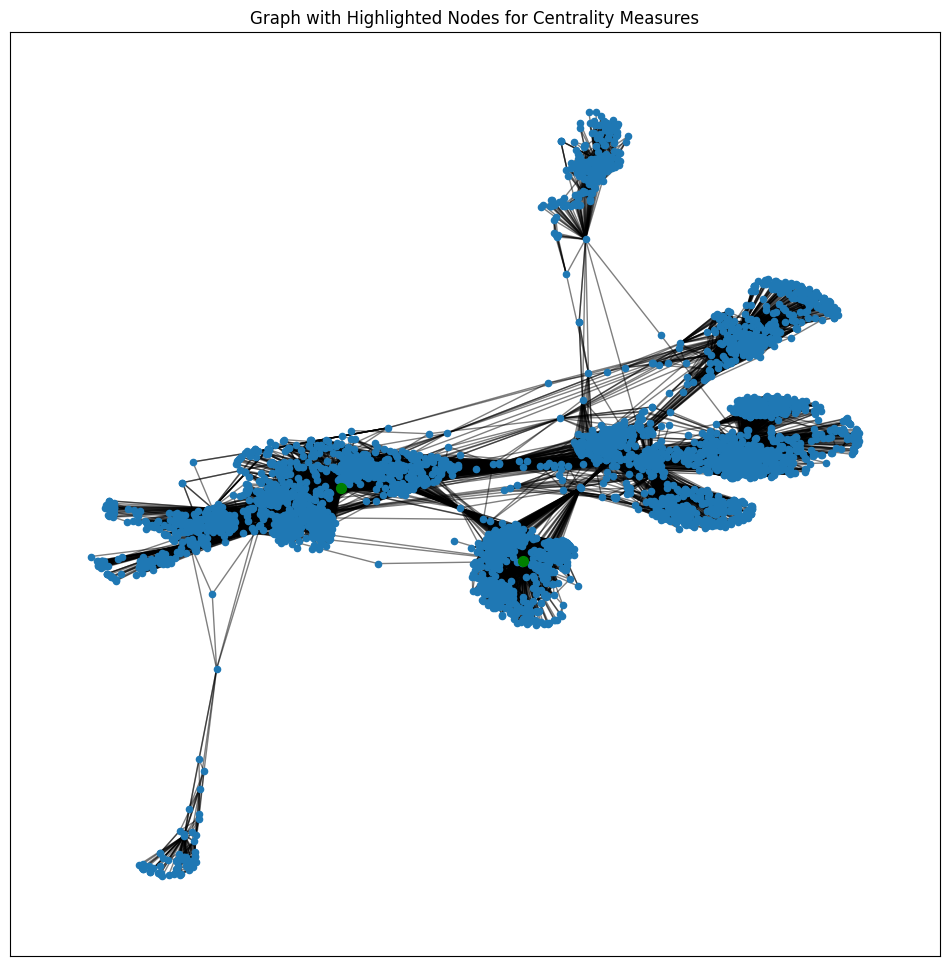

In [ ]:

undirected_graph = DG.to_undirected()

# Calculating various centrality measures
degree_centrality = nx.degree_centrality(undirected_graph)
closeness_centrality = nx.closeness_centrality(undirected_graph)
betweenness_centrality = nx.betweenness_centrality(undirected_graph)
eigenvector_centrality = nx.eigenvector_centrality(undirected_graph)

# Identifying the top nodes for each centrality measure
top_node_degree = max(degree_centrality, key=degree_centrality.get)
top_node_closeness = max(closeness_centrality, key=closeness_centrality.get)
top_node_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)
top_node_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)

# Nodes to highlight
highlight_nodes = {top_node_degree, top_node_closeness, top_node_betweenness, top_node_eigenvector}

# Visualizing the graph
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(undirected_graph)  # positions for all nodes

# Drawing all nodes
nx.draw_networkx_nodes(undirected_graph, pos, node_size=20, ax=ax)

# Highlighting specific nodes in green
nx.draw_networkx_nodes(undirected_graph, pos, nodelist=highlight_nodes, node_size=50, node_color='green', ax=ax)

# Drawing edges
nx.draw_networkx_edges(undirected_graph, pos, ax=ax, alpha=0.5)

plt.title("Graph with Highlighted Nodes for Centrality Measures")
plt.show()


In [ ]:
# Extracting the largest three communities from the previously detected communities
largest_three_communities = sorted(communities, key=len, reverse=True)[:3]

# Extracting the nodes of the largest three communities
largest_three_communities_nodes = [list(community) for community in largest_three_communities]

In [ ]:
# Creating subgraphs for each of the selected largest three communities
subgraphs = [undirected_graph.subgraph(community) for community in largest_three_communities]

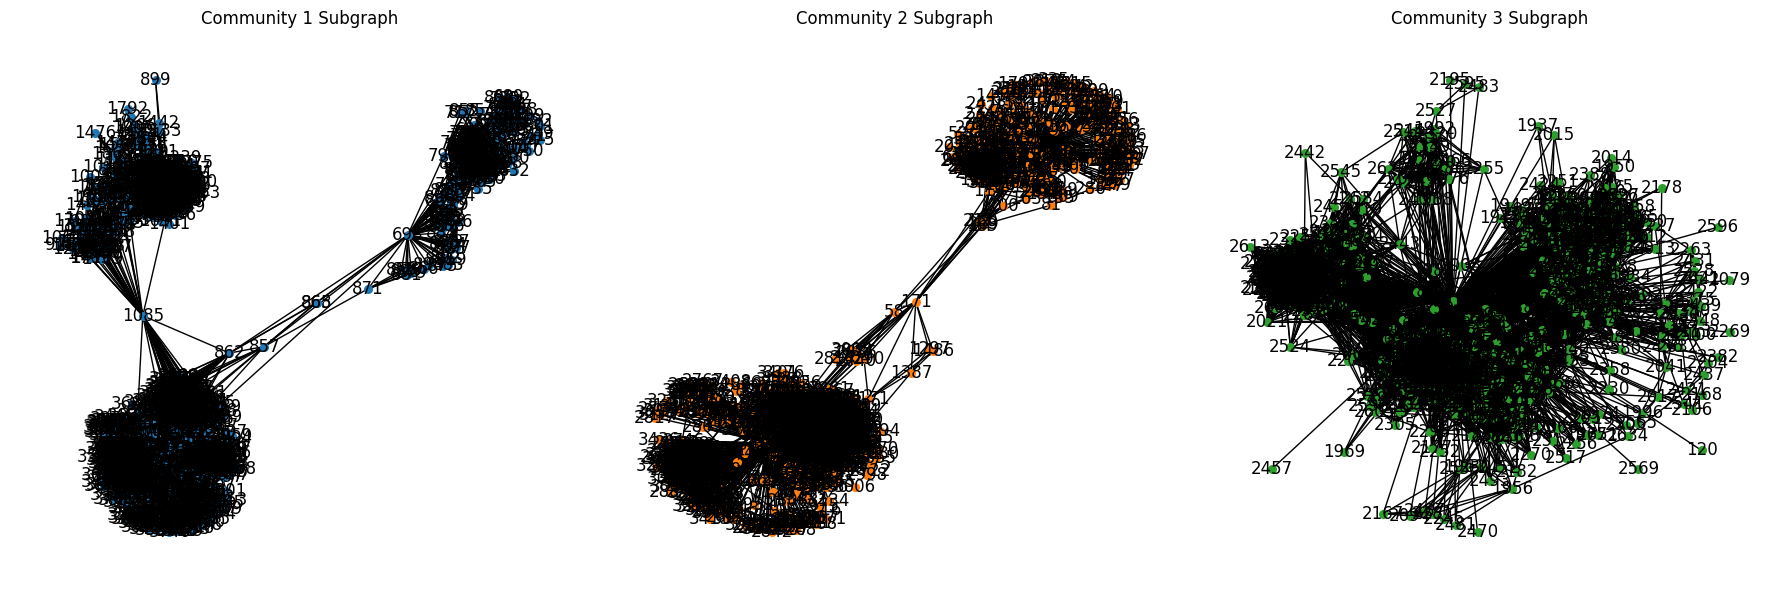

In [ ]:
# Drawing the subgraphs for each of the largest three communities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, subgraph in enumerate(subgraphs):
    # Drawing each subgraph
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, ax=axes[i], with_labels=True, node_color=f'C{i}', node_size=30)
    axes[i].set_title(f'Community {i+1} Subgraph')

plt.tight_layout()
plt.show()

In [ ]:
def remove_top_n_nodes(graph, centrality_measure, n=3):
    """
    Remove top n nodes based on a given centrality measure from the graph.

    Parameters:
    graph (networkx.Graph): The graph from which to remove nodes.
    centrality_measure (str): The type of centrality measure to use.
                              Options: 'degree', 'closeness', 'betweenness', 'eigenvector'
    n (int): The number of top nodes to remove.

    Returns:
    networkx.Graph: A new graph with the top n nodes removed.
    """
    if centrality_measure == 'degree':
        centrality = nx.degree_centrality(graph)
    elif centrality_measure == 'closeness':
        centrality = nx.closeness_centrality(graph)
    elif centrality_measure == 'betweenness':
        centrality = nx.betweenness_centrality(graph)
    elif centrality_measure == 'eigenvector':
        centrality = nx.eigenvector_centrality(graph)
    else:
        raise ValueError("Invalid centrality measure. Choose from 'degree', 'closeness', 'betweenness', 'eigenvector'.")

    # Sort nodes based on centrality measure and select top n
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:n]

    # Create a new graph without the top n nodes
    new_graph = graph.copy()
    new_graph.remove_nodes_from(top_nodes)

    return new_graph

# Example usage of the function
# new_graph = remove_top_n_nodes(undirected_graph, 'degree', n=3)  # This is just an example usage



In [ ]:
new_graph = remove_top_n_nodes(undirected_graph, 'degree', n=3)
new_graph

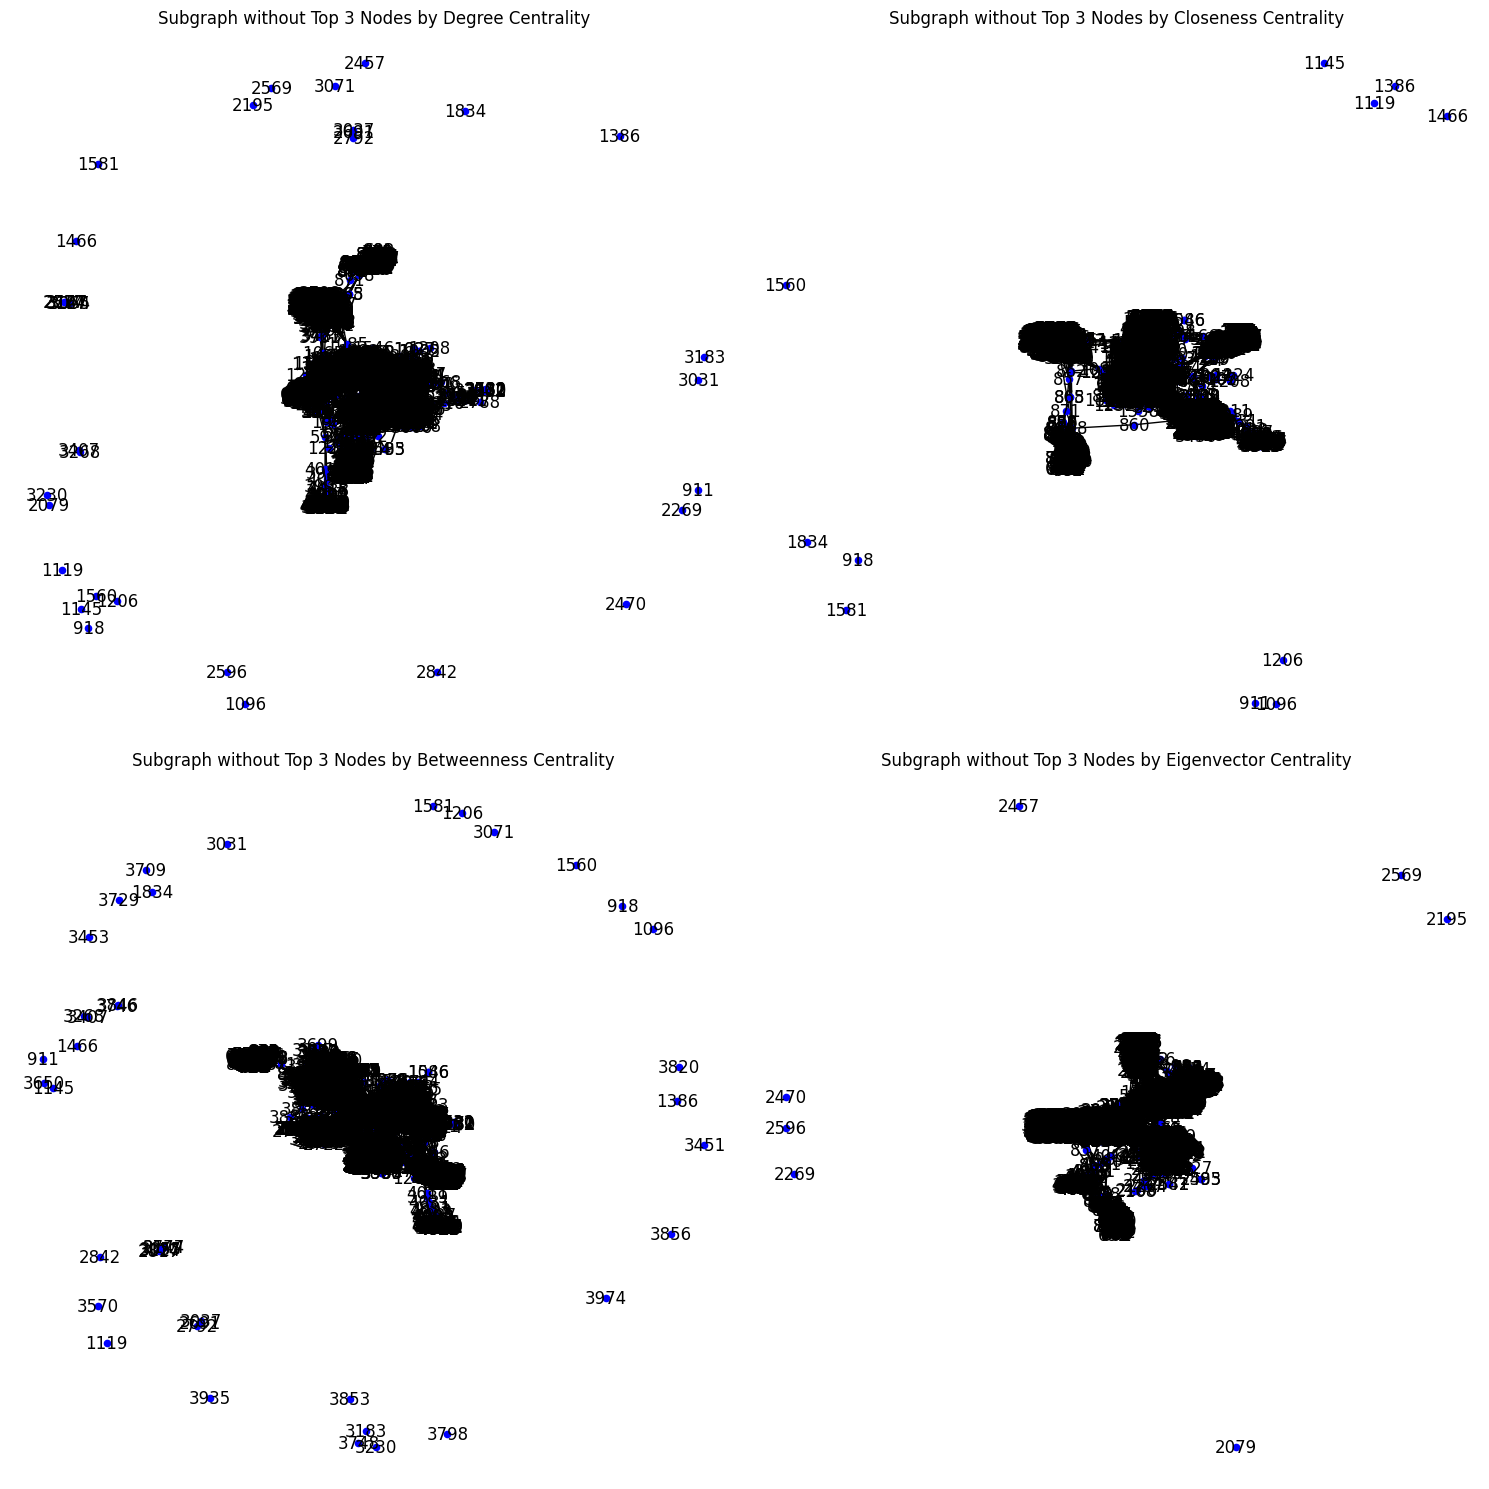

In [ ]:
# Drawing subgraphs after removing top nodes based on each centrality measure

# Creating a list of centrality measures
centrality_measures = ['degree', 'closeness', 'betweenness', 'eigenvector']

# Setting up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axs = axes.flatten()

for i, measure in enumerate(centrality_measures):
    # Remove top 3 nodes based on the current centrality measure
    modified_subgraph = remove_top_n_nodes(undirected_graph, measure, n=3)

    # Draw the modified subgraph
    pos = nx.spring_layout(modified_subgraph)  # Compute the layout
    nx.draw(modified_subgraph, pos, ax=axs[i], with_labels=True, node_color='blue', node_size=20)
    axs[i].set_title(f"Subgraph without Top 3 Nodes by {measure.capitalize()} Centrality")

plt.tight_layout()
plt.show()



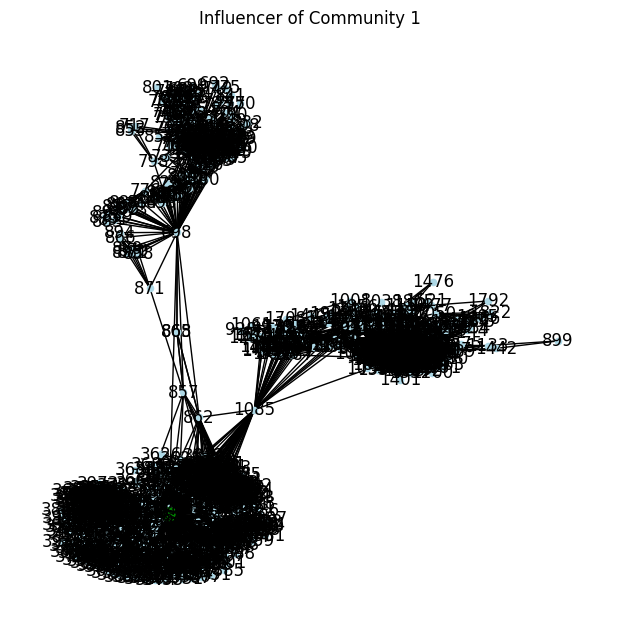

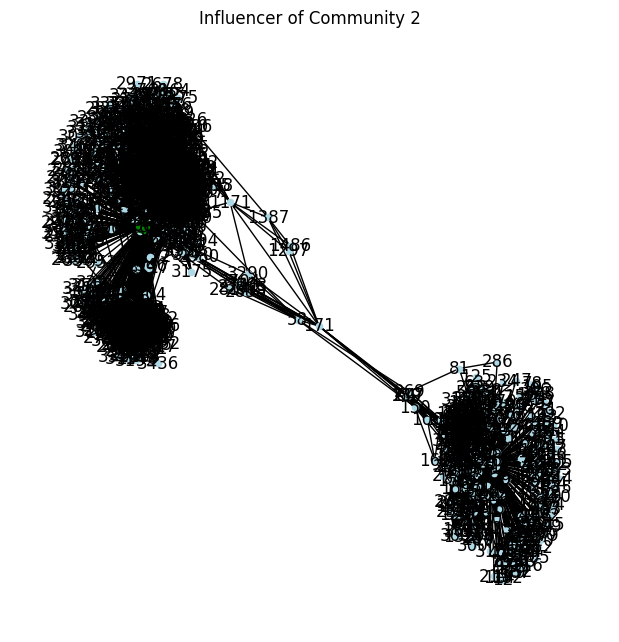

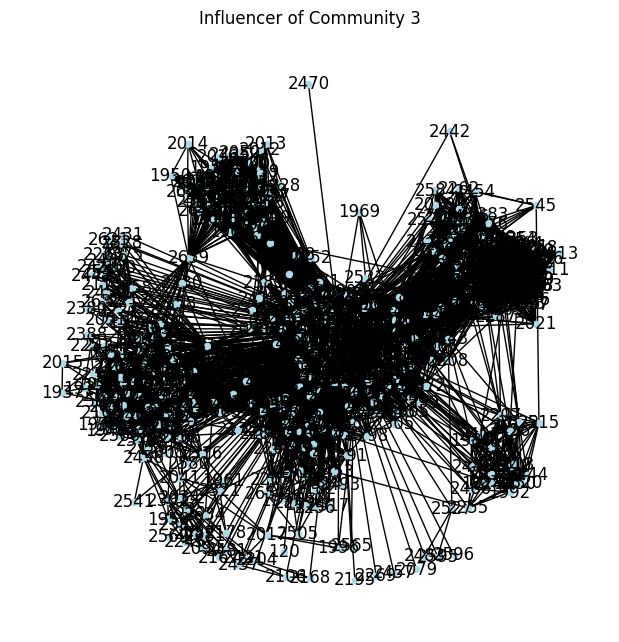

In [ ]:
#task10

# Re-creating subgraphs for the largest three communities
subgraphs = [undirected_graph.subgraph(community) for community in largest_three_communities]

# Drawing the influencers (top nodes based on degree centrality) of the top 3 communities
for i, subgraph in enumerate(subgraphs):
    # Calculate degree centrality within the subgraph
    subgraph_degree_centrality = nx.degree_centrality(subgraph)

    # Identify the top node based on degree centrality
    top_node = max(subgraph_degree_centrality, key=subgraph_degree_centrality.get)

    # Creating a figure for each subgraph's influencer
    plt.figure(figsize=(6, 6))

    # Drawing the subgraph
    pos = nx.spring_layout(subgraph)  # Compute the layout
    nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=20)

    # Highlight the influencer node
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[top_node], node_size=100, node_color='green')

    plt.title(f'Influencer of Community {i+1}')
    plt.show()



### Hypothetical Business: Marketing Agency
Marketing Agency specializes in leveraging social network analyses to optimize ad campaigns for maximum impact and cost-efficiency.

### Hypothetical Marketing Budget: $50,000
This budget is allocated for a single campaign targeting key individuals within a social network to maximize the campaign's reach and effectiveness.

### Hypothetical Cost Per Action (CPA): $5
This cost represents the expense incurred each time a user interacts with the advertisement (clicks, shares, likes, etc.).

### Targeting Strategy Based on Network Analysis:

1. **Identifying Key Influencers:**
   - **Largest Communities:** From the network analysis, we identified the three largest communities within the network. These communities are likely to have distinct characteristics or shared interests.
   - **Top Nodes by Centrality Measures:** Within these communities, we identified the top nodes based on various centrality measures (Degree, Closeness, Betweenness, Eigenvector). These nodes are influential within their respective communities and can significantly amplify the reach of the campaign.

2. **Action Plan:**
   - Community-Based Targeting:Allocate a portion of the budget to target the largest communities as a whole. This broad approach ensures widespread coverage and engagement within large segments of the network.
   - Influencer-Centric Campaigns: Dedicate a significant portion of the budget to engaging with the key influencers (top nodes) identified in each community. These individuals have the potential to significantly magnify the campaign's impact through their extensive reach and influence.
   - Content Customization: Tailor the content of the advertisements to resonate with the specific interests and characteristics of each community and influencer.

3. **Budget Allocation:**
   - **Community Engagement:** Allocate 40% of the budget to general community targeting. This includes ad placements and content tailored to each community's interests.
   - **Influencer Engagement:** Allocate 50%  to directly engage with the top influencers. This includes personalized campaigns, sponsored content, and influencer partnerships.
   - **Contingency and Miscellaneous:** Reserve 10% for unforeseen expenses, A/B testing, and campaign adjustments based on real-time analytics.

4. **Performance Metrics:**
   - **CPA Monitoring:** Regularly track the Cost Per Action to ensure cost-effectiveness.
   - **Engagement Analysis:** Monitor engagement metrics (clicks, shares, likes) to assess the impact of targeting key influencers versus broader community targeting.
   - **ROI Calculation:** Evaluate the return on investment by comparing the increase in desired actions (e.g., sales, sign-ups) to the campaign expenditure.

### Summary:
This action plan leverages network analysis to target influential individuals and communities within a network, maximizing the campaign's reach and impact within a specified budget. The plan emphasizes a balanced approach between broad community targeting and focused influencer engagement, ensuring both widespread coverage and impactful penetration into key network segments.